## Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an aattempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going dto take the following apporach:
1. Problem definition
2. data
3. Evaluation
4. Features
5. Modelling
6. Expermentation


## 1. Problem definition

In a statement
> Given clinical parameters about a patient, can we predict whether or not they have heart Disease ?

### 2. Data 
The original data came from the cleavland dara from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/dataset/heart+disease

There is also a version of it avaliable on Kaggle.  https://www.kaggle.com/ronitf/heart-disease-uci

### 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a payient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary** 

* age in years
* sex (1=male;0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm HG on admission to the hospital )
* chol serum cholestrol in mg/dl
* fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg resting electrocardiographic results
* the lachmaximum heart rate achieved
* exang exercise induced angina (1 = Yes;0 = No)
* old peakST depression induced by exercise relative to rest
* slope the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by floursopy
* the 13 = normal ; 6 = fixed defect ; 7 = reversable defect
* target 1 or 0

## Prepairing the tools

we're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [45]:
## Import all the tools we need 

## Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sns 
import seaborn as sn

%matplotlib inline # we want our plots to appear inside the notebook

## Models for sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KneighborsClassifier 
from sklearn.ensemble import RandomForestCLassifier 

## Model Evaluations 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import plot_roc_curve

UsageError: unrecognized arguments: # we want our plots to appear inside the notebook


## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape ##(rows,columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What questions are you trying to solve?
2. what kind of data do we have and how do we treat different type ?
3. what's missing from the data and how do you deal with it ?
4. Where are the outline and why should you care about them ?
5. How can you add, change or remove features to get more out of your data ?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

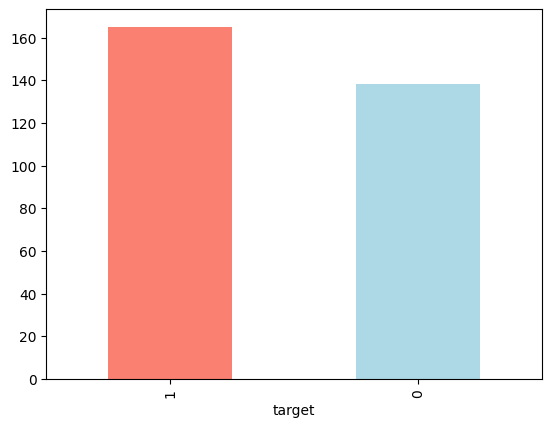

In [7]:
df["target"].value_counts().plot(kind="bar",color = ["salmon" , "lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
## Are there any missing values ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()  ## 1 for male and 0 for female

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
### Compare target column with sex column
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


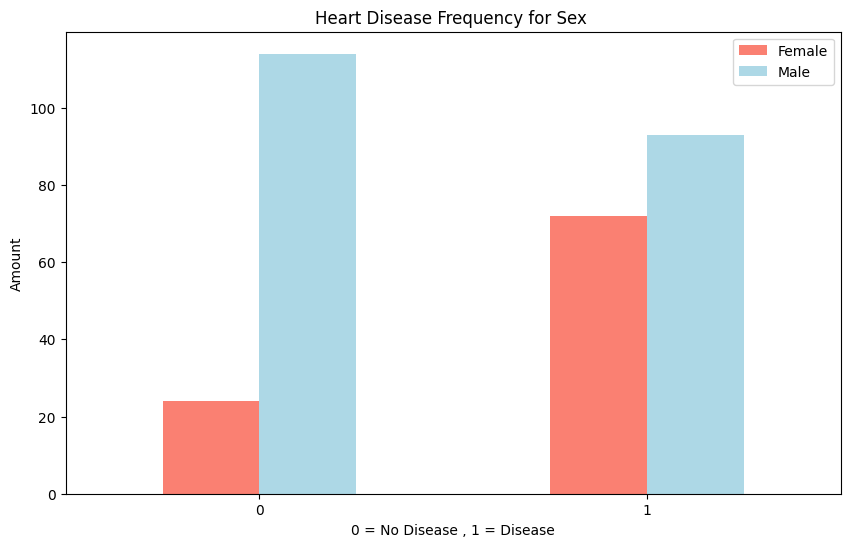

In [13]:
### Creat a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex ")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

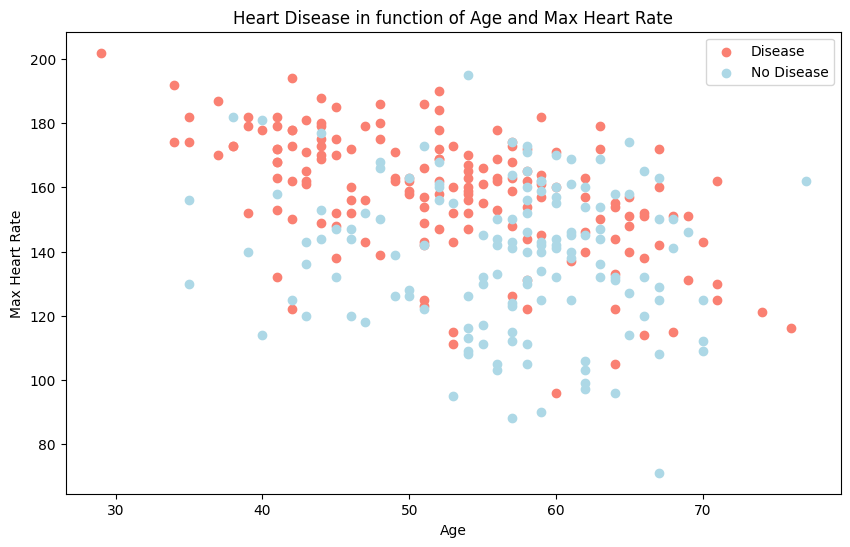

In [14]:
### Create another figure
plt.figure(figsize=(10,6))

## Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

### Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

## Addd some heplfull info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

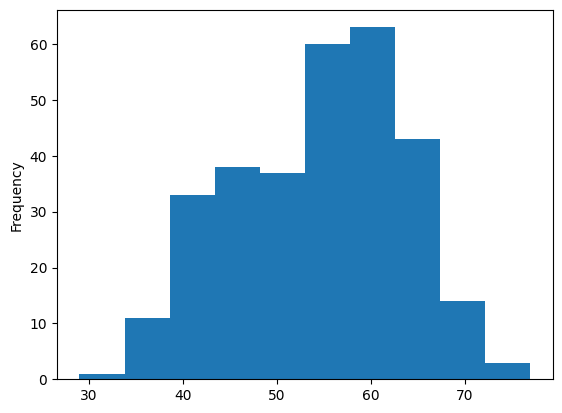

In [15]:
### Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain type

cp - chest pain type:
  * 0: Typical angina : chest pain related decrease blood supply to the heart
  * 1: Atypical angina : chest pain not related to heart
  * 2: Non-anginal pain : typically esophageal spasms (non heart related)
  * 3: Asymptomatic : chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


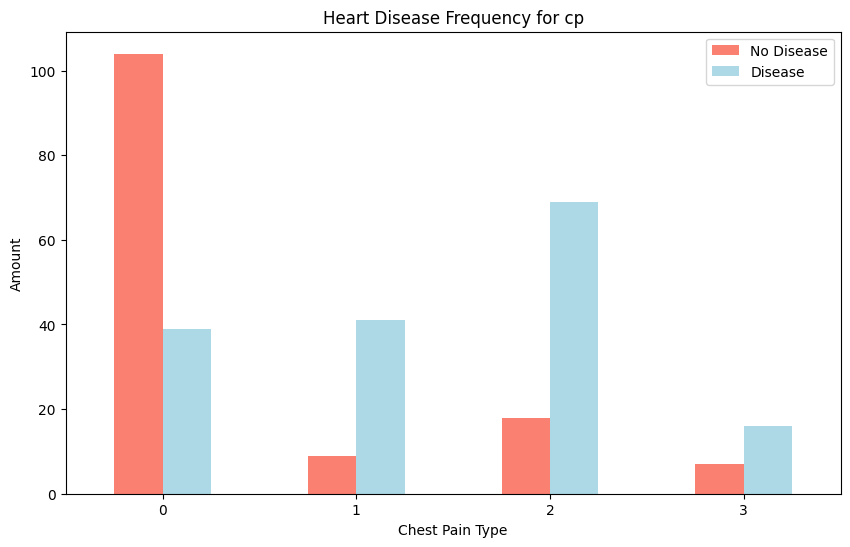

In [17]:
## Make the 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

plt.title("Heart Disease Frequency for cp")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [18]:
### Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


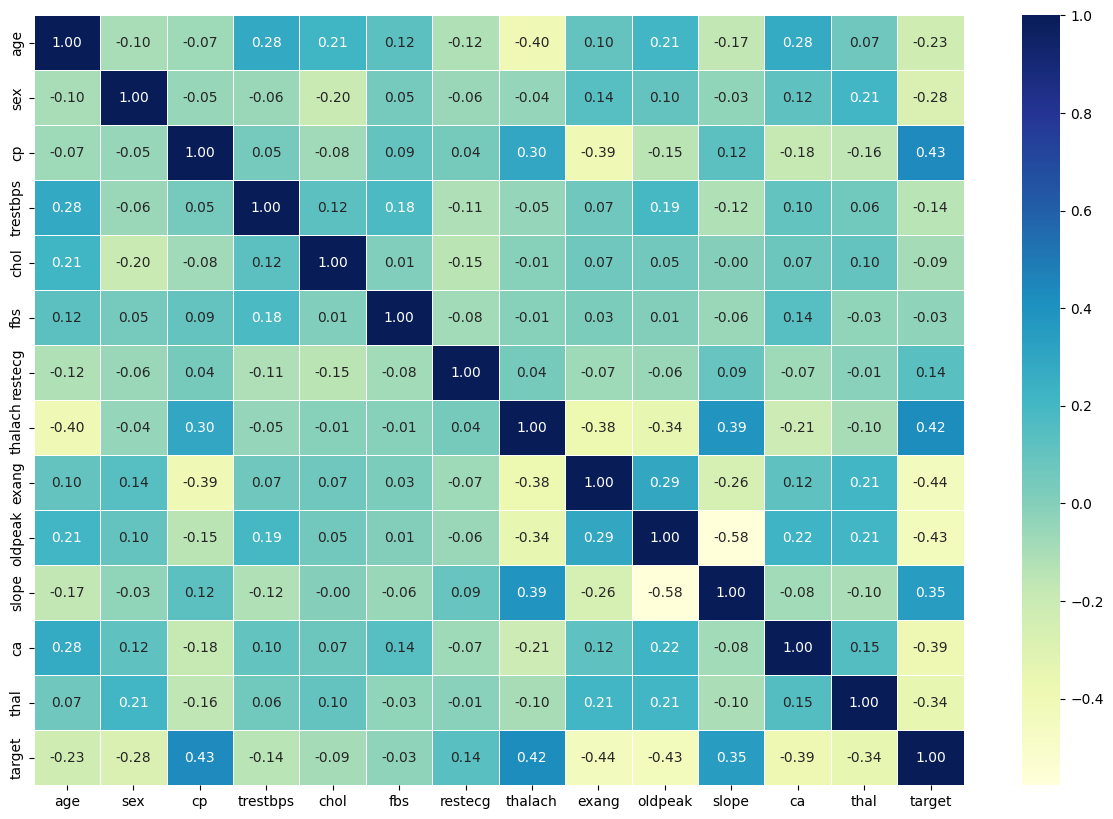

In [19]:
##Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sn.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

### 5. Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
## Split data into X and y 
X = df.drop("target",axis = 1)
y = df["target"]

In [22]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train , X_test , y_train , y_test =  train_test_split(X,y,test_size = 0.2)

Now we've got our data split into training and test sets , it's time to build a machine learning model.

we'll train it(find the patterns) onthe training set.

And we'll test it (use the patterns) on the test set.

we're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 


### Put models in a dictionary 
models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neihgbors": KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

### Creat a function to fit and score models
def fit_and_score(models ,X_train ,X_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dict to differetn Scikit-Learn machine learning models 
    X_train : training data (no labels)
    X_test : testing data (no lables)
    y_test : testing labels
    y_train : training labels
    """

    ## Set random seed
    np.random.seed(42)   
    ### make a dictionary to keep model score
    model_score = {}
    ### Loop through models 
    for name , models in models.items():
        #Fit the model to the data 
        models.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_score[name] = models.score(X_test,y_test)
    return model_score  
    

In [24]:
model_score = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_test = y_test,
                             y_train = y_train)
model_score

C:\Users\user\miniconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neihgbors': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

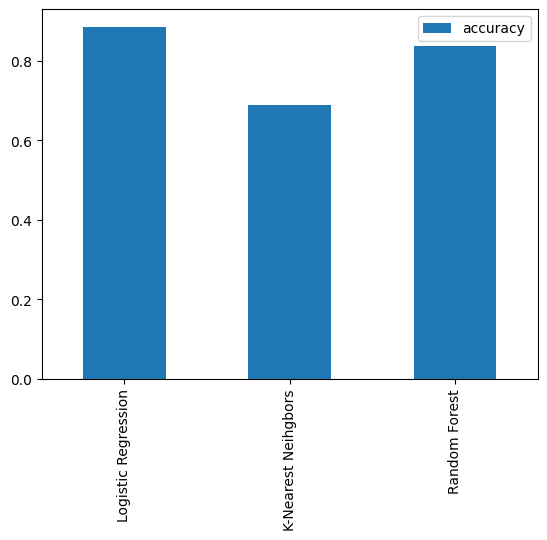

In [25]:
model_compare = pd.DataFrame(model_score , index = ["accuracy"])
model_compare.T.plot.bar();

Noe we've got a baseline model... and we know a model's first predictions aren't always what we sholuld based our next steps off.
what should do ?

Let's look at the folloeing:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparametetr tuning

In [26]:
### Let's tune KNN

train_scores = []
test_scores = []

## Create a list of different values for n_neighbors
neighbors = range(1,21)

## Setup KNN instance
knn = KNeighborsClassifier()

## Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors= i)

    ### fit the algorithm
    knn.fit(X_train,y_train)
    ### update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    ### Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [27]:
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


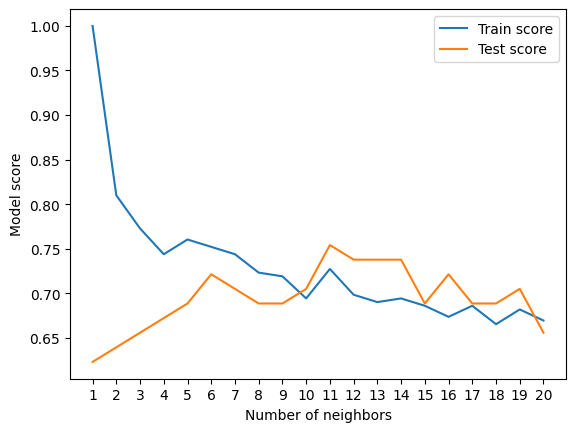

In [29]:
plt.plot(neighbors , train_scores , label= "Train score")
plt.plot(neighbors, test_scores,label ="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune :
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV  

In [30]:
### Create a hyperparameters grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver":["liblinear"]}

### Create a hyperparameter grid for RandomForestClasssifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None , 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now We're got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [31]:
### Tune LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

## Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameters search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now We've tuned LogisticRegression() , let's do the same for RandomForestClassifier()...

In [34]:
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
## Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose = True)

## Fit random hyperparameters search model for RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
rs_rf.score(X_test , y_test)

0.8688524590163934

### Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them using GridSearchCV...

In [37]:
from sklearn.model_selection import GridSearchCV
### Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver": ["liblinear"]}

## Setup grid hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [38]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluting our tuned machien learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible.

To make comparison and evaluate our trained model, first we need to make prediction

In [40]:
y_preds = gs_log_reg.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

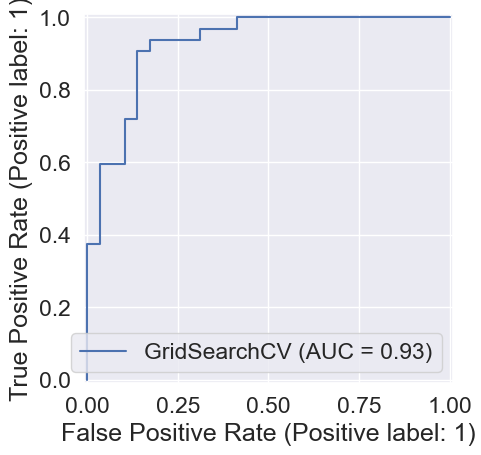

In [55]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot ROC curve
roc_display = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [49]:
### Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


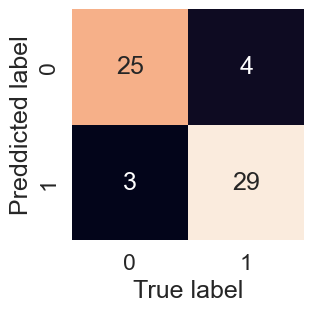

In [52]:
import seaborn as sn
sn.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_oreds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig , ax = plt.subplots(figsize = (3,3))
    ax = sn.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Preddicted label")
   
plot_conf_mat(y_test , y_preds)

Now we've got a ROC curve , an AUC metrics and a confusion matrix, let's gat a classification report as well as cross-validated precision,recall and f1-score.

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation

We're going to calculate accuracy,precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [60]:
## Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
## Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

In [66]:
### Cross-validated accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring = "accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [67]:
## Cross-validated precision
cv_precision = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [68]:
## Cross-validated recall 
cv_recall = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [71]:
## Cross-validated f1-score
cv_f1score = cross_val_score(clf, 
                         X,
                         y, 
                         cv=5,
                         scoring = "f1")
cv_f1score = np.mean(cv_f1score)
cv_f1score

0.8673007976269721

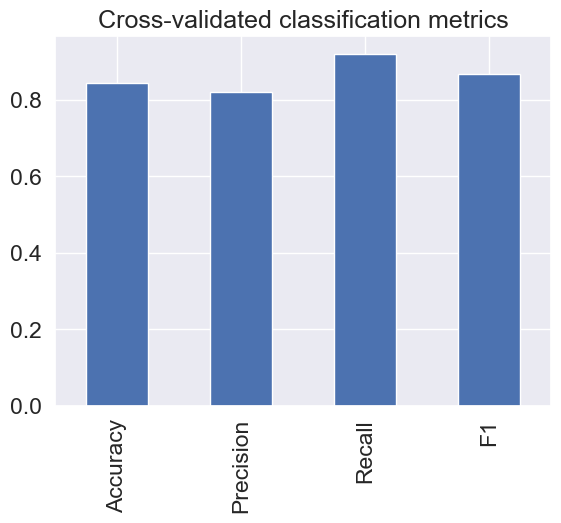

In [74]:
### Vizualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1": cv_f1score},
                          index = [0])
cv_metrics.T.plot.bar(title= "Cross-validated classification metrics",
                      legend = False);

### Feature importance 

Feature importance is another as asking, "which feature contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.one way to find feature importance is to search for (MODEL NAME) feature importance

Let's find the feature importance for our LogisticRegression model...

In [77]:
### Fit an instance of LogisticRegression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear" )

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [78]:
### Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [80]:
## Match coef's of features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

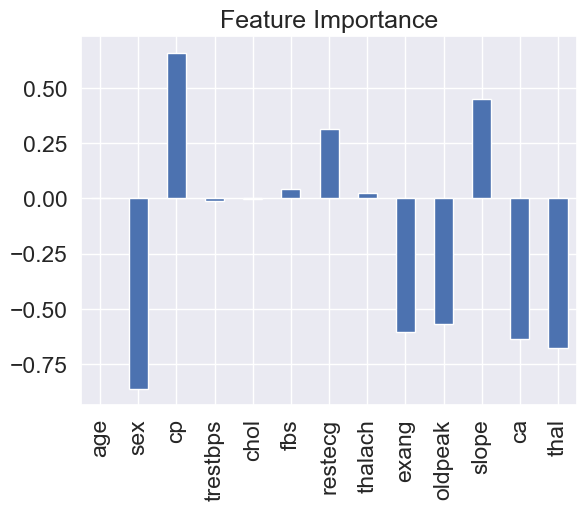

In [82]:
## Visualize feature importance 
feature_df = pd.DataFrame(feature_dict , index= [0])
feature_df.T.plot.bar(title="Feature Importance",legend= False);

In [83]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [84]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Experimentation 

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data ?
* Could you try a better model? Like CatBoost or XGBoost?
* Colud you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric)how would you export it and share it with others?